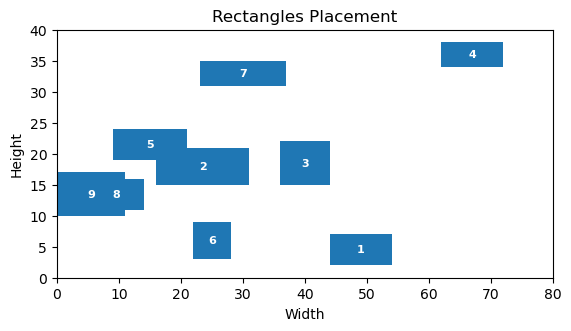

In [32]:
import matplotlib.pyplot as plt

# Define the bin dimensions
bin_width = 80
bin_height = 40

# Rectangles with width and height
rectangles = [
    {"id": 1, "width": 10, "height": 5, "x": 0, "y": bin_height - 5}, # Top 
    {"id": 2, "width": 15, "height": 6, "x": 0, "y": 0},              # Bottom 
    {"id": 3, "width": 8, "height": 7, "x": 20, "y": 10},             # Close to 4, 5, 9 
    {"id": 4, "width": 10, "height": 4, "x": 20, "y": 18}, 
    {"id": 5, "width": 12, "height": 5, "x": 28, "y": 10}, 
    {"id": 6, "width": 6, "height": 6, "x": 5, "y": 6},               # Close to 7, 2
    {"id": 7, "width": 14, "height": 4, "x": 5, "y": 12}, 
    {"id": 8, "width": 9, "height": 5, "x": 50, "y": 15},             # Placed optimally
    {"id": 9, "width": 11, "height": 7, "x": 20, "y": 25}             # Close to 3 ]
]
# Function to plot rectangles
def plot_rectangles(rectangles, bin_width, bin_height):
    fig, ax = plt.subplots()
    ax.set_xlim(0, bin_width)
    ax.set_ylim(0, bin_height)
    ax.set_aspect('equal')

    for rect in rectangles:
        ax.add_patch(plt.Rectangle((rect['x'], rect['y']), rect['width'], rect['height'], fill=True))
        ax.text(rect['x'] + rect['width']/2, rect['y'] + rect['height']/2, str(rect['id']),
                ha='center', va='center', color='white', fontsize=8, weight='bold')
    plt.title("Rectangles Placement") 
    plt.xlabel("Width") 
    plt.ylabel("Height")
    plt.show()

# For now, just placing the rectangles randomly within the bin
import random
for rect in rectangles:
    rect['x'] = random.randint(0, bin_width - rect['width'])
    rect['y'] = random.randint(0, bin_height - rect['height'])

plot_rectangles(rectangles, bin_width, bin_height)

In [28]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Define nodes (rectangles) and edges (constraints)
nodes = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float)
edges = torch.tensor([[1, 2], [3, 4], [3, 5], [3, 9], [7, 6], [7, 2]], dtype=torch.long).t()

# Node features: width and height
x = torch.tensor([
    [10, 5],
    [15, 6],
    [8, 7],
    [10, 4],
    [12, 5],
    [6, 6],
    [14, 4],
    [9, 5],
    [11, 7],
], dtype=torch.float)

# Create graph data
data = Data(x=x, edge_index=edges)

# GCN Layer
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(2, 16)
        self.conv2 = GCNConv(16, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

model = GCN()


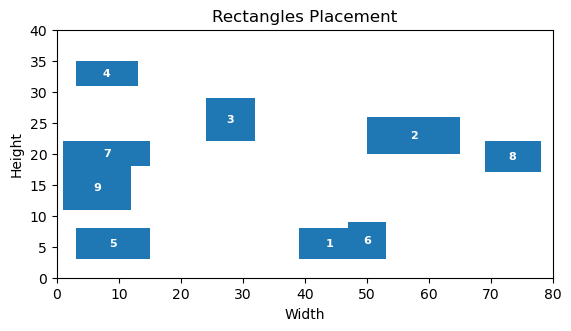

In [40]:
import random

def place_rectangles(rectangles, bin_width, bin_height):
    for rect in rectangles:
        rect['x'] = random.randint(0, bin_width - rect['width'])
        rect['y'] = random.randint(0, bin_height - rect['height'])
    return rectangles

def compute_reward(rectangles):
    # Compute a reward based on the placement constraints and area utilization
    # Example: penalize overlapping and reward minimal area usage
    reward = 0
    for rect in rectangles:
        reward -= rect['width'] * rect['height']  # Simplified example
    return reward

def optimize_placement(rectangles, bin_width, bin_height, iterations=1000):
    best_reward = float('-inf')
    best_placement = None
    for _ in range(iterations):
        placement = place_rectangles(rectangles, bin_width, bin_height)
        reward = compute_reward(placement)
        if reward > best_reward:
            best_reward = reward
            best_placement = placement
    return best_placement

best_placement = optimize_placement(rectangles, bin_width, bin_height)
plot_rectangles(best_placement, bin_width, bin_height)